# Programación Big Data.

## Autor: Victor Simo Lozano

## Actividad 7
<p>Spark Streaming y Teoría de Grafos.</p>
    

<hr style="border-color:red">

<div style="font-size:14px; text-align:justify"><b>PRIMERA PARTE.-</b><br></div>

Desarrollar el manual de modo que se compare los tiempos de instrucciones ejecutadas para Pandas/Vaex/Dask.

Dado que se trabaja con un entorno virtual para la asignatura de Programacion para Big Data, primeramente se ha de añadir el directorio donde se encuentra las librerias instaladas y que se usará en esta y las siguientes prácticas

In [1]:
import sys, os

bigdata_env = os.getenv("BIGDATA_ENV")
sys.path.append(bigdata_env)

In [2]:
# Crear diccionario que almacene los valores de diferencia de tiempos por cada ejercicio
from datetime import datetime
tiempos = {
    'index':['import','read parquet','read csv', 'describe', 'values counts', 'shape', 'data'],
    'pandas':[],
    'dask':[],
    'vaex':[]
}

<div style="font-size:14px; text-align:center"><b>PANDAS</b><br></div>

<div style="font-size:14px; text-align:justify"><b>1: </b>Importación de librería.</div>

In [3]:
%%time
t0 = datetime.now()

import pandas as pd

t1 = datetime.now()
tt =  t1 - t0

tiempos['pandas'].append(tt.total_seconds())

CPU times: total: 703 ms
Wall time: 900 ms


<div style="font-size:14px; text-align:justify"><b>2: </b>Importación del dataframe en formatos '.parquet' y '.csv'.</div>

In [4]:
%%time
t0 = datetime.now()

# Lectura del dataframe en formato .parquet
df_pandas = pd.read_parquet('yellow_tripdata_2018-01.parquet')

t1 = datetime.now()
tt =  t1 - t0

tiempos['pandas'].append(tt.total_seconds())

CPU times: total: 10.5 s
Wall time: 2.41 s


In [5]:
%%time
t0 = datetime.now()

# Lectura del dataframe en formato .csv
df_pandas = pd.read_csv('yellow_tripdata_2018-01.csv')

t1 = datetime.now()
tt =  t1 - t0

tiempos['pandas'].append(tt.total_seconds())

CPU times: total: 17.7 s
Wall time: 17.7 s


La importación del archivo en **'.csv' ha tardado 20 s** mientras que en formato **'.parquet' 5 s**. Esta gran diferencia muestra lo ventajoso que es trabajar con este formato cuando hablamos de archivos de gran volumen de datos (**8.759.874 de datos**).

<div style="font-size:14px; text-align:justify"><b>3: </b>Descripción de los datos del dataframe.</div>

In [6]:
%%time
t0 = datetime.now()

display(df_pandas.describe())

t1 = datetime.now()
tt =  t1 - t0

tiempos['pandas'].append(tt.total_seconds())

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06
mean,1.560940e+00,1.606855e+00,2.804001e+00,1.039545e+00,1.644585e+02,1.627269e+02,1.310611e+00,1.224434e+01,3.246822e-01,4.975067e-01,1.818745e+00,3.026133e-01,2.996306e-01,1.549098e+01
std,4.962724e-01,1.258464e+00,6.412346e+01,4.450700e-01,6.636021e+01,7.031164e+01,4.817818e-01,1.168321e+01,4.502524e-01,4.333319e-02,2.486341e+00,1.738185e+00,1.442815e-02,1.419540e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.500000e+02,-4.469000e+01,-5.000000e-01,-8.880000e+01,-1.500000e+01,-3.000000e-01,-4.503000e+02
25%,1.000000e+00,1.000000e+00,9.100000e-01,1.000000e+00,1.160000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00
50%,2.000000e+00,1.000000e+00,1.550000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.130000e+01
75%,2.000000e+00,2.000000e+00,2.840000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.350000e+00,0.000000e+00,3.000000e-01,1.662000e+01
max,2.000000e+00,9.000000e+00,1.894838e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,8.016000e+03,6.000000e+01,4.549000e+01,4.417100e+02,9.507000e+02,1.000000e+00,8.016800e+03


CPU times: total: 5.25 s
Wall time: 5.25 s


<div style="font-size:14px; text-align:justify"><b>4: </b>Obtener el numero de valores para la columna 'fare_amount'.</div>

In [7]:
%%time
t0 = datetime.now()

display(df_pandas['fare_amount'].value_counts())

t1 = datetime.now()
tt =  t1 - t0

tiempos['pandas'].append(tt.total_seconds())

6.00       473234
5.50       465176
6.50       461927
7.00       446376
5.00       433249
            ...  
30.60           1
2409.00         1
168.88          1
201.50          1
33.96           1
Name: fare_amount, Length: 1714, dtype: int64

CPU times: total: 188 ms
Wall time: 175 ms


<div style="font-size:14px; text-align:justify"><b>5: </b>Obtener el tamaño del dataframe.</div>

In [8]:
%%time
t0 = datetime.now()

display(df_pandas.shape)

t1 = datetime.now()
tt =  t1 - t0

tiempos['pandas'].append(tt.total_seconds())

(8759874, 17)

CPU times: total: 0 ns
Wall time: 3.01 ms


<div style="font-size:14px; text-align:justify"><b>6: </b>Obtener últimos valores del dataframe.</div>

In [9]:
%%time
t0 = datetime.now()

display(df_pandas.tail())

t1 = datetime.now()
tt =  t1 - t0

tiempos['pandas'].append(tt.total_seconds())

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8759869,1,2018-01-31 23:21:35,2018-01-31 23:34:20,2,2.80,1,N,158,163,1,12.0,0.5,0.5,2.65,0.0,0.3,15.95
8759870,1,2018-01-31 23:35:51,2018-01-31 23:38:57,1,0.60,1,N,163,162,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95
8759871,2,2018-01-31 23:28:00,2018-01-31 23:37:09,1,2.95,1,N,74,69,2,10.5,0.5,0.5,0.00,0.0,0.3,11.80
8759872,2,2018-01-31 23:24:40,2018-01-31 23:25:28,1,0.00,1,N,7,193,2,0.0,0.0,0.0,0.00,0.0,0.0,0.00
8759873,2,2018-01-31 23:28:16,2018-01-31 23:28:38,1,0.00,1,N,7,193,2,0.0,0.0,0.0,0.00,0.0,0.0,0.00


CPU times: total: 31.2 ms
Wall time: 26 ms


<hr style="border-color:black">

<div style="font-size:14px; text-align:center"><b>DASK</b><br></div>

<div style="font-size:14px; text-align:justify"><b>1: </b>Importación de librería.</div>

In [10]:
%%time
t0 = datetime.now()

import dask.dataframe as dd

t1 = datetime.now()
tt =  t1 - t0

tiempos['dask'].append(tt.total_seconds())

CPU times: total: 766 ms
Wall time: 1.01 s


<div style="font-size:14px; text-align:justify"><b>2: </b>Importación del dataframe en formatos '.parquet' y '.csv'.</div>

In [11]:
%%time
t0 = datetime.now()

df_dask = dd.read_parquet('yellow_tripdata_2018-01.parquet', assume_missing=True)

t1 = datetime.now()
tt =  t1 - t0

tiempos['dask'].append(tt.total_seconds())

CPU times: total: 31.2 ms
Wall time: 20.2 ms


In [12]:
%%time
t0 = datetime.now()

df_dask = dd.read_csv('yellow_tripdata_2018-01.csv', assume_missing=True)

t1 = datetime.now()
tt =  t1 - t0

tiempos['dask'].append(tt.total_seconds())

CPU times: total: 15.6 ms
Wall time: 16.7 ms


En este caso, al estar trabajando con una libreria más optimizada para el trabajo en Big Data, se ve como la diferencia entre leer un '.csv' y un '.parquet' es apenas de ms.

<div style="font-size:14px; text-align:justify"><b>3: </b>Descripción de los datos del dataframe.</div>

In [13]:
%%time
t0 = datetime.now()

display(df_dask.describe().compute())

t1 = datetime.now()
tt =  t1 - t0

tiempos['dask'].append(tt.total_seconds())

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06
mean,1.560940e+00,1.606855e+00,2.804001e+00,1.039545e+00,1.644585e+02,1.627269e+02,1.310611e+00,1.224434e+01,3.246822e-01,4.975067e-01,1.818745e+00,3.026133e-01,2.996306e-01,1.549098e+01
std,4.962724e-01,1.258464e+00,6.412346e+01,4.450700e-01,6.636021e+01,7.031164e+01,4.817818e-01,1.168321e+01,4.502524e-01,4.333319e-02,2.486341e+00,1.738185e+00,1.442815e-02,1.419540e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.500000e+02,-4.469000e+01,-5.000000e-01,-8.880000e+01,-1.500000e+01,-3.000000e-01,-4.503000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.750000e+00
50%,2.000000e+00,1.000000e+00,1.650000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,1.500000e+00,0.000000e+00,3.000000e-01,1.180000e+01
75%,2.000000e+00,2.000000e+00,3.100000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.400000e+01,1.000000e+00,5.000000e-01,2.500000e+00,0.000000e+00,3.000000e-01,1.730000e+01
max,2.000000e+00,9.000000e+00,1.894838e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,8.016000e+03,6.000000e+01,4.549000e+01,4.417100e+02,9.507000e+02,1.000000e+00,8.016800e+03


CPU times: total: 1min 2s
Wall time: 20.7 s


<div style="font-size:14px; text-align:justify"><b>4: </b>Obtener el numero de valores para la columna 'fare_amount'.</div>

In [14]:
%%time
t0 = datetime.now()

display(df_dask.fare_amount.value_counts().compute())

t1 = datetime.now()
tt =  t1 - t0

tiempos['dask'].append(tt.total_seconds())

6.00       473234
5.50       465176
6.50       461927
7.00       446376
5.00       433249
            ...  
60.06           1
60.30           1
60.53           1
60.55           1
8016.00         1
Name: fare_amount, Length: 1714, dtype: int64

CPU times: total: 22.1 s
Wall time: 5.53 s


<div style="font-size:14px; text-align:justify"><b>5: </b>Obtener el tamaño del dataframe.</div>

In [15]:
%%time
t0 = datetime.now()

a = df_dask.shape
display([a[0].compute(),a[1]])

t1 = datetime.now()
tt =  t1 - t0

tiempos['dask'].append(tt.total_seconds())

[8759874, 17]

CPU times: total: 37.2 s
Wall time: 15.1 s


<div style="font-size:14px; text-align:justify"><b>6: </b>Obtener últimos valores del dataframe.</div>

In [16]:
%%time
t0 = datetime.now()

display(df_dask.tail())

t1 = datetime.now()
tt =  t1 - t0

tiempos['dask'].append(tt.total_seconds())

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
728696,1.0,2018-01-31 23:21:35,2018-01-31 23:34:20,2.0,2.80,1.0,N,158.0,163.0,1.0,12.0,0.5,0.5,2.65,0.0,0.3,15.95
728697,1.0,2018-01-31 23:35:51,2018-01-31 23:38:57,1.0,0.60,1.0,N,163.0,162.0,1.0,4.5,0.5,0.5,1.15,0.0,0.3,6.95
728698,2.0,2018-01-31 23:28:00,2018-01-31 23:37:09,1.0,2.95,1.0,N,74.0,69.0,2.0,10.5,0.5,0.5,0.00,0.0,0.3,11.80
728699,2.0,2018-01-31 23:24:40,2018-01-31 23:25:28,1.0,0.00,1.0,N,7.0,193.0,2.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00
728700,2.0,2018-01-31 23:28:16,2018-01-31 23:28:38,1.0,0.00,1.0,N,7.0,193.0,2.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00


CPU times: total: 1.86 s
Wall time: 1.86 s


<hr style="border-color:black">

<div style="font-size:14px; text-align:center"><b>VAEX</b><br></div>

<div style="font-size:14px; text-align:justify"><b>1: </b>Importación de librería.</div>

In [17]:
%%time
t0 = datetime.now()

import vaex

t1 = datetime.now()
tt =  t1 - t0

tiempos['vaex'].append(tt.total_seconds())

CPU times: total: 1.61 s
Wall time: 1.77 s


<div style="font-size:14px; text-align:justify"><b>2: </b>Importación del dataframe en formatos '.parquet' y '.csv'.</div>

In [18]:
%%time
t0 = datetime.now()

df_vaex = vaex.open('yellow_tripdata_2018-01.parquet')

t1 = datetime.now()
tt =  t1 - t0

tiempos['vaex'].append(tt.total_seconds())

CPU times: total: 1.05 s
Wall time: 1.18 s


In [19]:
%%time
t0 = datetime.now()

df_vaex = vaex.from_csv('yellow_tripdata_2018-01.csv')

t1 = datetime.now()
tt =  t1 - t0

tiempos['vaex'].append(tt.total_seconds())

CPU times: total: 21.8 s
Wall time: 21.4 s


<div style="font-size:14px; text-align:justify"><b>2.1: </b>Exportación a formato '.hdf5'.</div>

In [20]:
%%time

df_vaex.export('yellow_tripdata_2018-01.hdf5')

CPU times: total: 5.95 s
Wall time: 9.08 s


In [21]:
%%time

df_vaex = vaex.open('yellow_tripdata_2018-01.hdf5')

CPU times: total: 15.6 ms
Wall time: 27.3 ms


En el paso 2.1 se puedo observar como existe nuevamente gran diferencia de tiempos al abrir el formato '.csv' y el '.parquet'. 15 segundos frente a 180 ms. 

Finalmente, en el paso 2.1 se trabaja con un formato optimizado para el trabajo en Big Data, pudiendo guardar incluso diferentes tipos de archivo en uno mismo. Tal es su optimizacion para este campo, que su lectura (de casi 9 M de filas) se hace en 30 ms.

<div style="font-size:14px; text-align:justify"><b>3: </b>Descripción de los datos del dataframe.</div>

In [22]:
%%time
t0 = datetime.now()

# Información del dataset de un modo más visual
display(df_vaex.info())

t1 = datetime.now()
tt =  t1 - t0

tiempos['vaex'].append(tt.total_seconds())

column,type,unit,description,expression
VendorID,int64,,,
tpep_pickup_datetime,str,,,
tpep_dropoff_datetime,str,,,
passenger_count,int64,,,
trip_distance,float64,,,
RatecodeID,int64,,,
store_and_fwd_flag,str,,,
PULocationID,int64,,,
DOLocationID,int64,,,
payment_type,int64,,,


None

CPU times: total: 15.6 ms
Wall time: 17.1 ms


<div style="font-size:14px; text-align:justify"><b>4: </b>Obtener el numero de valores para la columna 'fare_amount'.</div>

In [23]:
%%time
t0 = datetime.now()

display(df_vaex.fare_amount.value_counts())

t1 = datetime.now()
tt =  t1 - t0

tiempos['vaex'].append(tt.total_seconds())

6.00      473234
5.50      465176
6.50      461927
7.00      446376
5.00      433249
           ...  
63.70          1
51.70          1
268.50         1
233.50         1
281.62         1
Length: 1714, dtype: int64

CPU times: total: 609 ms
Wall time: 107 ms


<div style="font-size:14px; text-align:justify"><b>5: </b>Obtener el tamaño del dataframe.</div>

In [24]:
%%time
t0 = datetime.now()

display(df_vaex.count('*'))

t1 = datetime.now()
tt =  t1 - t0

tiempos['vaex'].append(tt.total_seconds())

array(8759874, dtype=int64)

CPU times: total: 78.1 ms
Wall time: 20.3 ms


<div style="font-size:14px; text-align:justify"><b>6: </b>Obtener últimos valores del dataframe.</div>

In [25]:
%%time
t0 = datetime.now()

display(df_vaex)

t1 = datetime.now()
tt =  t1 - t0

tiempos['vaex'].append(tt.total_seconds())

#,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.0,0.0,0.3,5.8
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.0,0.0,0.3,15.3
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.0,0.0,0.3,8.3
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.0,0.0,0.3,34.8
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"8,759,869",1,2018-01-31 23:21:35,2018-01-31 23:34:20,2,2.8,1,N,158,163,1,12.0,0.5,0.5,2.65,0.0,0.3,15.95
"8,759,870",1,2018-01-31 23:35:51,2018-01-31 23:38:57,1,0.6,1,N,163,162,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95
"8,759,871",2,2018-01-31 23:28:00,2018-01-31 23:37:09,1,2.95,1,N,74,69,2,10.5,0.5,0.5,0.0,0.0,0.3,11.8
"8,759,872",2,2018-01-31 23:24:40,2018-01-31 23:25:28,1,0.0,1,N,7,193,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0


CPU times: total: 15.6 ms
Wall time: 24 ms


<hr style="border-color:black">

<div style="font-size:14px; text-align:center"><b>CONCLUSIONES</b><br></div>

In [26]:
tiempos = pd.DataFrame.from_dict(tiempos).set_index('index')

tiempos

,pandas,dask,vaex
index,,,
import,0.900306,1.006165,1.758527
read parquet,2.411928,0.020240,1.184220
read csv,17.723860,0.016702,21.434815
describe,5.248580,20.730992,0.017079
values counts,0.175113,5.527854,0.107135
shape,0.003008,15.129083,0.020252
data,0.025954,1.864280,0.024000


<AxesSubplot:xlabel='index'>

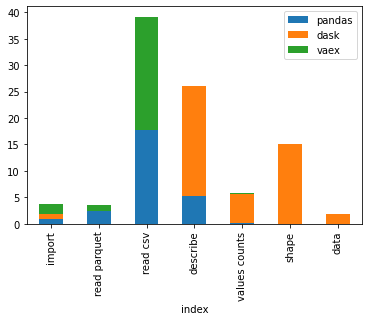

In [27]:
tiempos.plot(kind='bar', stacked=True)

In [28]:
tiempos.describe()

,pandas,dask,vaex
count,7.000000,7.000000,7.000000
mean,3.784107,6.327902,3.506575
std,6.430472,8.300728,7.936061
min,0.003008,0.016702,0.017079
25%,0.100533,0.513203,0.022126
50%,0.900306,1.864280,0.107135
75%,3.830254,10.328468,1.471373
max,17.723860,20.730992,21.434815


Como conclusion, la libreria **vaex** tiene una mayor ventaja que el resto para un análisis de datos tipo BigData. Pese a obtener un tiempo máximo mayor al resto en uno de los procesos y no el menor mínimo, se aprecia como su rendimiento es mejor en la comparación.

Además, con el mencionado archivo .hdf5, su lectura es en milisegundos. Por ende, un tipo de archivo preparado para Big Data con una herramiento preparada para el Big Data, hacen un perfecto tándem.

<div style="font-size:14px; text-align:justify"><b>SEGUNDA PARTE.-</b><br></div>

Elegir entre VAEX o DASK para realizar de forma autodidacta un análisis de un dataset.

En este caso, la libreria escogida por las conclusiones obtenidas es **VAEX**

<div style="font-size:14px; text-align:center"><b>VAEX</b><br></div>

Como ejemplo para el uso de esta libreria, se ha escogido un dataset de kaggle para "Data Science Job Salaries"

**Fuente:** <a href="https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries">Dataset<a>

**1-** Importar los datos y mostrarlos

In [29]:
import numpy as np
import pylab as plt
import seaborn as sns

In [30]:
%%time
df = vaex.from_csv('ds_salaries.csv')

CPU times: total: 15.6 ms
Wall time: 11.1 ms


In [31]:
%%time
df.info()

column,type,unit,description,expression
Unnamed: 0,int64,,,
work_year,int64,,,
experience_level,str,,,
employment_type,str,,,
job_title,str,,,
salary,int64,,,
salary_currency,str,,,
salary_in_usd,int64,,,
employee_residence,str,,,
remote_ratio,int64,,,


CPU times: total: 15.6 ms
Wall time: 18.8 ms


**Explicacion de las columnas**

    - Work year: Año del salario.
    - Experience level: 
        EN: Entry-level/Junior.
        MI: Mid-level/Intermediate.
        SE: Senior-level/Expert.
        EX: Executive-level/Director.
    - Employement type:
        PT: Part time.
        FT: Full time.
        CT: Contract.
        FL: Freelance.
    - Job title: El rol que se desempeña.
    - Salary: El salario.
    - Salary currency:  La moneda de pago del salario.
    - Salary in USD: Equivalencia del salario en USD.
    - Employee residence: Lugar de residencia del empleado.
    - Remote ratio: La cantidad de trabajo realizado en remoto (0-50-100)
    - Company location: Lugar de la empresa
    - Company size: Tamaño de la empresa
        S < 50 empleados.
        50 < M < 250 empleados.
        L  > 250 empleados.
    
    

**2-** Eliminar columnas

Vemos que hay una columna sin nombrar que se va a eliminar.
También se elimina *Employee residence* ya que con el lugar de la empresa vemos suficiente

In [32]:
df = df.drop(['Unnamed: 0', 'employee_residence'])

In [33]:
df

#,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,50,US,L
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,100,US,M


**3-** Escoger los datos para europa

Dado que existe diferentes tipos de moneda, para hacerlo sobre un mismo indice, se elimina la columa de *salary* y *salary_currency*

In [34]:
# Ver paises de estudio del dataframe
countries = df.company_location.unique()

countries.sort()

countries

['AE',
 'AS',
 'AT',
 'AU',
 'BE',
 'BR',
 'CA',
 'CH',
 'CL',
 'CN',
 'CO',
 'CZ',
 'DE',
 'DK',
 'DZ',
 'EE',
 'ES',
 'FR',
 'GB',
 'GR',
 'HN',
 'HR',
 'HU',
 'IE',
 'IL',
 'IN',
 'IQ',
 'IR',
 'IT',
 'JP',
 'KE',
 'LU',
 'MD',
 'MT',
 'MX',
 'MY',
 'NG',
 'NL',
 'NZ',
 'PK',
 'PL',
 'PT',
 'RO',
 'RU',
 'SG',
 'SI',
 'TR',
 'UA',
 'US',
 'VN']

In [35]:
# Con la ayuda de "https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes" se ha escogido los paises que pertenecen al continente europeo
eur_iso = ['AT', 'BE', 'CH', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IT', 'LU', 'MD', 'MT', 'NL', 'PL', 'PT', 'RO', 'RU', 'SI', 'TR', 'UA']
names = ['Austria','Belgica','Suiza','Rep. Checa', 'Alemania','Dinamarca','Estonia','España','Francia','Gran Bretaña', 'Grecia', 'Croacia','Hungria','Irlanda',
        'Italia','Luxemburgo','Moldavia','Malta','Holanda','Polonia','Portugal','Rumania','Rusia','Eslovenia','Turquia','Ucrania']

In [36]:
# Filtrar dataframe por valores en lista
df_eur = df[df.company_location.isin(eur_iso)]
# Eliminar columnas
df_eur = df_eur.drop(['salary','salary_currency'])

# Mapeamos el nombre de los paises para verlo más claramente
# Creamos lista con el nombre del pais por orden de apareción en el dataframe
names_col = []
for id, row in df_eur.iterrows():
    # row: Nos da los valores de cada columna de la fila
    # row['company_location']: Valor de la columna para la fila
    # list.index(): Nos da la posición en la lista eur_iso del nombre en iso
    # list.append(names[]): Añadir el nombre de pais según posición recogida en .index
    names_col.append(names[eur_iso.index(row['company_location'])])
    
# Conversión a array para pasar valores a columna
names_col = np.array(names_col)

# Eliminar "lazy filter" de dataframe y dejarlo con la longitud filtrada
# Fuente: https://vaex.readthedocs.io/en/latest/faq.html?highlight=new%20dataframe#Why-can't-I-add-a-new-column-after-filtering-a-vaex-DataFrame?
df_eur = df_eur.extract()

# Asignamos valores del array a columna
df_eur['company_location'] = names_col

df_eur

#,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,0,Alemania,L
1,2020,SE,FT,Big Data Engineer,109024,50,Gran Bretaña,M
2,2020,MI,FT,Data Scientist,35735,50,Hungria,L
3,2020,EN,FT,Data Scientist,51321,0,Francia,S
4,2020,EN,FT,Data Scientist,39916,0,Francia,M
...,...,...,...,...,...,...,...,...
155,2022,MI,FT,Data Scientist,122346,0,Suiza,L
156,2022,EN,FT,Computer Vision Engineer,10000,100,Luxemburgo,M
157,2022,MI,FT,Data Analyst,20000,100,Grecia,S
158,2022,MI,FT,Data Analyst,65438,0,Gran Bretaña,M


In [37]:
# Consideramos de análisis únicamente aquellos que tienen trabajo a tiempo completo y despues eliminamos columna "employment_type"
df_eur = df_eur[df_eur['employment_type'] == 'FT']
df_eur = df_eur.drop('employment_type')
df_eur

#,work_year,experience_level,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2020,MI,Data Scientist,79833,0,Alemania,L
1,2020,SE,Big Data Engineer,109024,50,Gran Bretaña,M
2,2020,MI,Data Scientist,35735,50,Hungria,L
3,2020,EN,Data Scientist,51321,0,Francia,S
4,2020,EN,Data Scientist,39916,0,Francia,M
...,...,...,...,...,...,...,...
148,2022,MI,Data Scientist,122346,0,Suiza,L
149,2022,EN,Computer Vision Engineer,10000,100,Luxemburgo,M
150,2022,MI,Data Analyst,20000,100,Grecia,S
151,2022,MI,Data Analyst,65438,0,Gran Bretaña,M


**4-** Ploteo de algunos datos

c:\python3_8_5\lib\site-packages\vaex\viz\mpl.py:205: UserWarning: `scatter` is deprecated and it will be removed in version 5.x. Please use `df.viz.scatter` instead.
  warnings.warn('`scatter` is deprecated and it will be removed in version 5.x. Please use `df.viz.scatter` instead.')


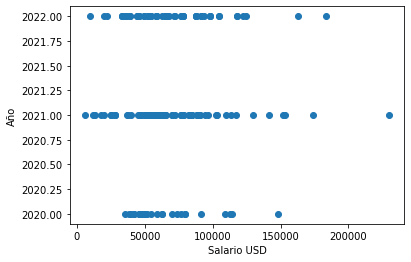

In [38]:
df_eur.scatter(df_eur.salary_in_usd, df_eur.work_year, xlabel='Salario USD', ylabel='Año')

Se ve con este gráfico Scatter como el margen de salarios se ha ampliado más en función que ha ido aumentando los años. De modo que a dia de hoy puedo haber sueldos más bajos, a nivel general, que hace dos años.

,job_title,salary_in_usd
0,Machine Learning Engineer,80303.000000
1,ML Engineer,21983.000000
2,Lead Machine Learning Engineer,87932.000000
3,Machine Learning Infrastructure Engineer,58255.000000
4,Data Engineer,74421.333333
5,Data Scientist,87775.900000
6,Data Analyst,41859.888889
7,ETL Developer,54957.000000
8,Head of Data,32974.000000
9,Principal Data Scientist,162674.000000


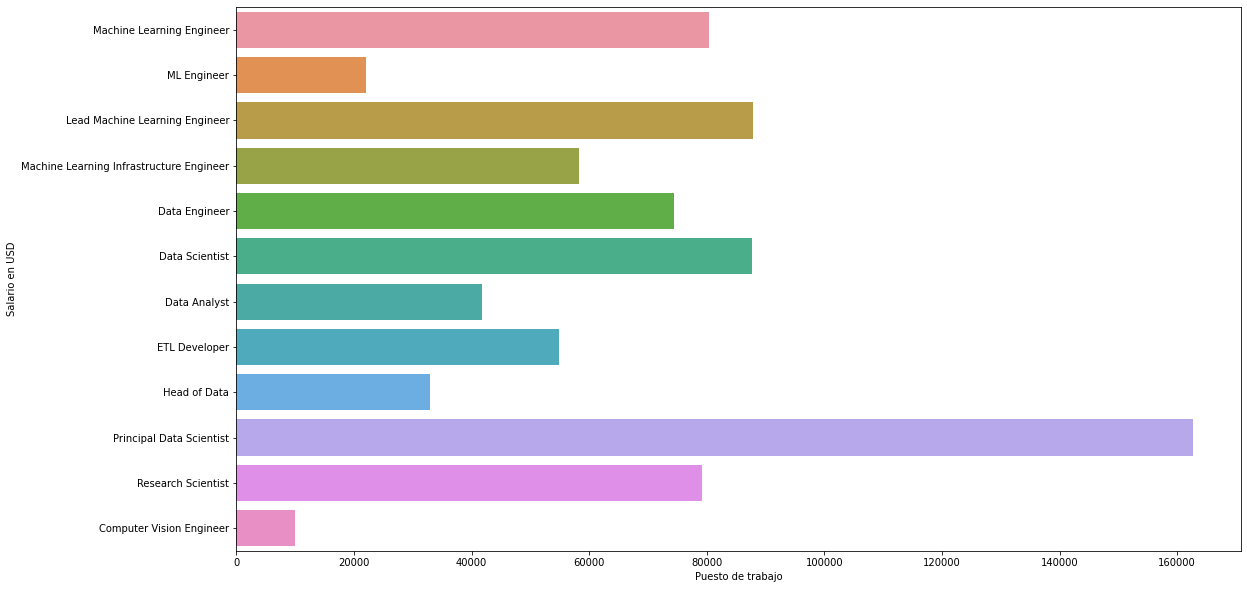

In [39]:
# Agrupacion del dataframe por title de trabajo, añadiendo la media de salario, escogiendo los salarios del ultimo año
df_job = df_eur[df_eur['work_year'] == 2022]
df_job = df_job.groupby(by='job_title').agg({'salary_in_usd':'mean'})

# Convertir a dataframe de pandas para operar con él
df_job = df_job.to_pandas_df()
display(df_job)

# Ploteo de los resultados
plt.figure(figsize=(18,10))
sns.barplot(x="salary_in_usd", y="job_title", data=df_job)
plt.xlabel('Puesto de trabajo')
plt.ylabel('Salario en USD')
plt.show()

Los puestos de trabajo mejor pagados para el 2022 se observa que es **Principal Data Scientist**, **Data Scientist** y **Lead ML Engineer**. Mientras que los salarios más bajos para *Computer Vision Engineer*, *ML Engineer* y *Head of Data*.

<div style="font-size:14px; text-align:justify"><b>TERCERA PARTE.-</b><br></div>

**Modin** se trata de una gran herramienta para determinados set de datos. Realizar el mismo ejercicio que en la primera parte para esta librería.

In [40]:
# Crear diccionario que almacene los valores de diferencia de tiempos por cada ejercicio
temp_mod_vs_pandas = {
    'index':['import','read parquet','read csv', 'describe', 'values counts', 'shape', 'data'],
    'pandas':[],
    'modin':[]
}

temp_mod_vs_pandas['pandas'] = tiempos['pandas']

<div style="font-size:14px; text-align:justify"><b>1: </b>Importación de librería.</div>

In [41]:
# %%time
t0 = datetime.now()

import modin.pandas as md

t1 = datetime.now()
tt =  t1 - t0

temp_mod_vs_pandas['modin'].append(tt.total_seconds())

In [42]:
import ray
ray.init()

2022-07-12 20:21:45,091	INFO services.py:1456 -- View the Ray dashboard at http://127.0.0.1:8265


RayContext(dashboard_url='127.0.0.1:8265', python_version='3.8.5', ray_version='1.12.1', ray_commit='4863e33856b54ccf8add5cbe75e41558850a1b75', address_info={'node_ip_address': '127.0.0.1', 'raylet_ip_address': '127.0.0.1', 'redis_address': None, 'object_store_address': 'tcp://127.0.0.1:64654', 'raylet_socket_name': 'tcp://127.0.0.1:57907', 'webui_url': '127.0.0.1:8265', 'session_dir': 'C:\\Users\\vicsi\\AppData\\Local\\Temp\\ray\\session_2022-07-12_20-21-41_418803_14484', 'metrics_export_port': 57610, 'gcs_address': '127.0.0.1:57890', 'address': '127.0.0.1:57890', 'node_id': '568502a17c6e6e68066ed06c1b64844832511a7a661c84fe9a9a8c32'})

<div style="font-size:14px; text-align:justify"><b>2: </b>Importación del dataframe en formatos '.parquet' y '.csv'.</div>

In [43]:
# %%time
t0 = datetime.now()

# Lectura del dataframe en formato .parquet
df_modin = md.read_parquet('yellow_tripdata_2018-01.parquet')

t1 = datetime.now()
tt =  t1 - t0

temp_mod_vs_pandas['modin'].append(tt.total_seconds())

In [44]:
# %%time
t0 = datetime.now()

# Lectura del dataframe en formato .parquet
df_modin = md.read_csv('yellow_tripdata_2018-01.csv')

t1 = datetime.now()
tt =  t1 - t0

temp_mod_vs_pandas['modin'].append(tt.total_seconds())

La importación del archivo en **'.csv' ha tardado 7 s** mientras que en formato **'.parquet' 2.56 s**. Recordando el set de datos de 9 M, son valores muy óptimos y además más optimios que los de pandas.

<div style="font-size:14px; text-align:justify"><b>3: </b>Descripción de los datos del dataframe.</div>

In [45]:
%%time
t0 = datetime.now()

display(df_modin.describe())

t1 = datetime.now()
tt =  t1 - t0

temp_mod_vs_pandas['modin'].append(tt.total_seconds())

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06
mean,1.560940e+00,1.606855e+00,2.804001e+00,1.039545e+00,1.644585e+02,1.627269e+02,1.310611e+00,1.224434e+01,3.246822e-01,4.975067e-01,1.818745e+00,3.026133e-01,2.996306e-01,1.549098e+01
std,4.962724e-01,1.258464e+00,6.412346e+01,4.450700e-01,6.636021e+01,7.031164e+01,4.817818e-01,1.168321e+01,4.502524e-01,4.333319e-02,2.486341e+00,1.738185e+00,1.442815e-02,1.419540e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.500000e+02,-4.469000e+01,-5.000000e-01,-8.880000e+01,-1.500000e+01,-3.000000e-01,-4.503000e+02
25%,1.000000e+00,1.000000e+00,9.100000e-01,1.000000e+00,1.160000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00
50%,2.000000e+00,1.000000e+00,1.550000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.130000e+01
75%,2.000000e+00,2.000000e+00,2.840000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.350000e+00,0.000000e+00,3.000000e-01,1.662000e+01
max,2.000000e+00,9.000000e+00,1.894838e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,8.016000e+03,6.000000e+01,4.549000e+01,4.417100e+02,9.507000e+02,1.000000e+00,8.016800e+03


CPU times: total: 1.11 s
Wall time: 32.4 s


<div style="font-size:14px; text-align:justify"><b>4: </b>Obtener el numero de valores para la columna 'fare_amount'.</div>

In [46]:
%%time
t0 = datetime.now()

display(df_modin['fare_amount'].value_counts())

t1 = datetime.now()
tt =  t1 - t0

temp_mod_vs_pandas['modin'].append(tt.total_seconds())

Please refer to https://modin.readthedocs.io/en/stable/supported_apis/defaulting_to_pandas.html for explanation.


6.00       473234
5.50       465176
6.50       461927
7.00       446376
5.00       433249
            ...  
60.06           1
60.30           1
60.53           1
60.55           1
8016.00         1
Name: fare_amount, Length: 1714, dtype: int64

CPU times: total: 750 ms
Wall time: 3.2 s


Al tratarse de una operación no implementada por modin, este la ejecuta en python y la devuelve a modin. Dado este paso extra, se trata de una operación la cual se efectua en **3 s**

<div style="font-size:14px; text-align:justify"><b>5: </b>Obtener el tamaño del dataframe.</div>

In [47]:
%%time
t0 = datetime.now()

display(df_modin.shape)

t1 = datetime.now()
tt =  t1 - t0

temp_mod_vs_pandas['modin'].append(tt.total_seconds())

(8759874, 17)

CPU times: total: 31.2 ms
Wall time: 8.7 ms


<div style="font-size:14px; text-align:justify"><b>6: </b>Obtener últimos valores del dataframe.</div>

In [48]:
%%time
t0 = datetime.now()

display(df_modin.tail())

t1 = datetime.now()
tt =  t1 - t0

temp_mod_vs_pandas['modin'].append(tt.total_seconds())

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8759869,1,2018-01-31 23:21:35,2018-01-31 23:34:20,2,2.80,1,N,158,163,1,12.0,0.5,0.5,2.65,0.0,0.3,15.95
8759870,1,2018-01-31 23:35:51,2018-01-31 23:38:57,1,0.60,1,N,163,162,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95
8759871,2,2018-01-31 23:28:00,2018-01-31 23:37:09,1,2.95,1,N,74,69,2,10.5,0.5,0.5,0.00,0.0,0.3,11.80
8759872,2,2018-01-31 23:24:40,2018-01-31 23:25:28,1,0.00,1,N,7,193,2,0.0,0.0,0.0,0.00,0.0,0.0,0.00
8759873,2,2018-01-31 23:28:16,2018-01-31 23:28:38,1,0.00,1,N,7,193,2,0.0,0.0,0.0,0.00,0.0,0.0,0.00


CPU times: total: 125 ms
Wall time: 1.04 s


<hr style="border-color:black">

<div style="font-size:14px; text-align:center"><b>CONCLUSIONES</b><br></div>

In [49]:
temp_mod_vs_pandas = pd.DataFrame.from_dict(temp_mod_vs_pandas).set_index('index')

temp_mod_vs_pandas

,pandas,modin
index,,
import,0.900306,0.126545
read parquet,2.411928,12.970720
read csv,17.723860,30.160014
describe,5.248580,32.351252
values counts,0.175113,3.200039
shape,0.003008,0.008699
data,0.025954,1.037447


<AxesSubplot:xlabel='index'>

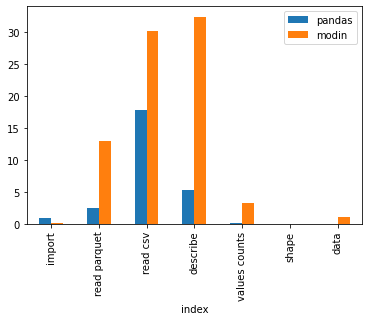

In [50]:
temp_mod_vs_pandas.plot(kind='bar')

In [51]:
temp_mod_vs_pandas.describe()

,pandas,modin
count,7.000000,7.000000
mean,3.784107,11.407817
std,6.430472,14.287723
min,0.003008,0.008699
25%,0.100533,0.581996
50%,0.900306,3.200039
75%,3.830254,21.565367
max,17.723860,32.351252


Como conclusion, en mi caso particular, la librería **modin** ha tardado más tiempo en ejecutar las mismas operaciones que en pandas

<div style="font-size:14px; text-align:justify"><b>CUARTA PARTE.-</b><br></div>

**Rapids** o **Koalas** son otras librerias que se puede emplear para el análisis de datasets como las vistas en esta práctica. Elige una, u otra que prefieras, y realiza algun análisis de dataset

<div style="font-size:14px; text-align:center"><b>KOALAS</b><br></div>

En base a la documentación vista de **KOALAS**, se toma como decisión realizar este apartado con dicha libreria frente a RAPIDS y su forma de trabajar.<br>
Para el desarrollo del apartado, se ha elegido un dataset de kaggle sobre los 10 000 tweets escritos sobre Uber hasta el 11 de Julio.

**Fuente:**<br>
https://koalas.readthedocs.io/en/latest/<br>
https://www.kabel.es/koalas-la-libreria-que-aprovecha-el-potencial-de-pandas-en-combinacion-con-spark-para-proyectos-data-science/<br>
<a href="https://www.kaggle.com/datasets/vishesh1412/twitter-dataset-uber">Dataset<a>

<div style="font-size:14px; text-align:justify"><b>1: </b>Importación de libreria.</div>

In [52]:
import databricks.koalas as ks

<div style="font-size:14px; text-align:justify"><b>2: </b>Lectura de fichero y muestra de datos.</div>

In [53]:
%%time
df_uber = ks.read_csv('Uber.csv')
df_uber.head(2)

CPU times: total: 672 ms
Wall time: 30.3 s


,_c0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,1546244282515951616,1546244282515951616,1657488339000.0,2022-07-10 21:25:39,0,None,motorista do uber é flamenguista meu deus que ...,pt,[],[],1520876934770606080,1520876934770606080,3m53s,pedrøca,7,21,https://twitter.com/3m53s/status/1546244282515...,[],[],0,None,False,0,0,0,None,Uber,None,None,None,None,None,None,[],None,None,None,None
1,1,1546244279533678592,1546244279533678592,1657488338000.0,2022-07-10 21:25:38,0,None,“Le service de hélage électronique Uber a entr...,fr,[],[],970304563944284165,970304563944284165,CorbeauAttentif,François Lemay📌,7,21,https://twitter.com/CorbeauAttentif/status/154...,['https://lnkd.in/gUPwGJ3n'],[],0,None,False,0,0,0,None,Uber,None,None,None,None,None,None,[],None,None,None,None


In [54]:
# Longitud de los datos en filas y columnas
df_uber.shape

(10012, 39)

En lo que hace a la rapidez de lectura del **.csv**, se observa que es una lectura muy optimizada, se ha realizado en **800  ms**

**Nota:** Importante para mostrar los datos, indicar ```df.head()``` ya que de lo contrario, imprime los primeros 1000 datos

<div style="font-size:14px; text-align:justify"><b>3: </b>Selección de datos.</div>

In [55]:
# Tipo de dato de cada columna del dataset
df_uber.dtypes

_c0                object
id                 object
conversation_id    object
created_at         object
date               object
timezone            int64
place              object
tweet              object
language           object
hashtags           object
cashtags           object
user_id            object
user_id_str        object
username           object
name               object
day                object
hour               object
link               object
urls               object
photos             object
video              object
thumbnail          object
retweet            object
nlikes             object
nreplies           object
nretweets          object
quote_url          object
search             object
near               object
geo                object
source             object
user_rt_id         object
user_rt            object
retweet_id         object
reply_to           object
retweet_date       object
translate          object
trans_src          object
trans_dest  

In [56]:
# Nombre de las columnas de dataset
df_uber.columns

Index(['_c0', 'id', 'conversation_id', 'created_at', 'date', 'timezone',
       'place', 'tweet', 'language', 'hashtags', 'cashtags', 'user_id',
       'user_id_str', 'username', 'name', 'day', 'hour', 'link', 'urls',
       'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [57]:
# Columnas a ser borradas por no interesar en este caso
delete_columns = ['_c0', 'id', 'conversation_id', 'created_at', 'date', 'timezone', 'place', 'hashtags', 'cashtags', 'user_id', 
                  'user_id_str', 'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video', 'thumbnail', 'retweet', 'nlikes',
                  'nreplies', 'nretweets', 'quote_url', 'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id',
                  'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest']
# borrado de columnas
df_language = df_uber
df_language.pop(delete_columns)

df_language.head(2)

,tweet,language
0,motorista do uber é flamenguista meu deus que ...,pt
1,“Le service de hélage électronique Uber a entr...,fr


In [58]:
# Valores que tiene la columna de 'language'
df_language.language.value_counts(dropna=True).sort_index()

  https://t.co/gwuk4utnUr"                                                                                                                                                                                                                                                      1
 ""A whole lot more than you expected."""                                                                                                                                                                                                                                       1
 ""meilleur jeune économiste"" du prix décerné par @lemondefr. Merci le Monde pour ses ""révélations"". Dur dur                                                                                                                                                                 5
 ""pillage du pays"": des élus de gauche ont vivement dénoncé dimanche les liens qui ont uni Emmanuel Macron et la société Uber                                                   

Con la columna de idioma, hay valores que claramente no debería estar ahí.<br>
Analizando los valores, se llega a la conslusión de que los valores que verdaderamente indican un idioma, son aquellos que tiene **2 caracteres**.

In [59]:
# Agrupar valores de la columna language
df_group = df_language.groupby(by=['language'], as_index=True, dropna=True).nunique().sort_index()
# Modificar nombre de columna resultante
df_group = df_group.rename(columns={"tweet":"repetitions"})

df_group.head(5)

,repetitions
language,
"https://t.co/gwuk4utnUr""",1
"""""A whole lot more than you expected.""""""",1
"""""meilleur jeune économiste"""" du prix décerné par @lemondefr. Merci le Monde pour ses """"révélations"""". Dur dur",3
"""""pillage du pays"""": des élus de gauche ont vivement dénoncé dimanche les liens qui ont uni Emmanuel Macron et la société Uber",2
"""""pillage du pays"""": des élus de gauche ont vivement dénoncé dimanche les liens qui ont.. https://t.co/CMlScy4QY2 https://t.co/247y7RAoYy""",1


In [60]:
# Obtener datos válidos para la columna
valid_lang = []
for index, values in df_language.iterrows():
    if len(str(values.language)) == 2:
        valid_lang.append(values.language)
        # Eliminar los valores repetidos
        valid_lang = list(dict.fromkeys(valid_lang))
        
valid_lang

['pt',
 'fr',
 'en',
 'es',
 'it',
 'nl',
 'ja',
 'pl',
 'de',
 'cs',
 'ca',
 'el',
 'is',
 'fi',
 'tr',
 'sl',
 'sv',
 'in',
 'zh',
 'ta',
 'ro',
 'tl',
 'ru',
 'no',
 'cy',
 'ar',
 'iw',
 'da',
 'bg',
 'hi',
 'ur',
 'sr',
 'uk',
 'eu',
 'ht']

In [61]:
# Filtrar los valores que sean un lenguaje válido
df_final = df_group.filter(items=valid_lang, axis=0)
df_final = df_final.reset_index()

df_final.head(5)

,language,repetitions
0,ar,19
1,bg,4
2,ca,47
3,cs,18
4,cy,1


<div style="font-size:14px; text-align:justify"><b>4: </b>Plotear los valores.</div>

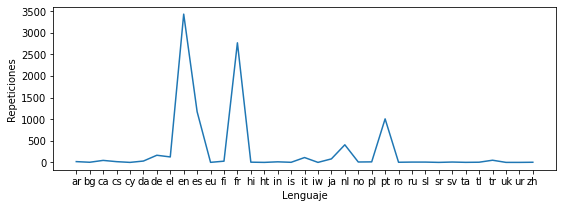

In [62]:
# Ploteo con Koalas
# df_final.plot.barh()

# Ploteo con matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 3))

plt.plot(df_final.language, df_final.repetitions)
plt.ylabel('Repeticiones')
plt.xlabel('Lenguaje')
plt.show()


**Nota:** <br>
Para poder represenatar gráficas con *Koalas* es necesario tener instalada la libreria de **Plotly**. Esta no viene instalada en el paquete de Koalas con ``pip install koalas``

En la celda, se pude apreciar comentado el código para presentar rápidamente con Koalas, pero debido a problemas con Jupyter Lab en el ploteo, se añade una pequeña gráfica con matplotlib